In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
import time
import pandas as pd
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import seaborn as sns
fp = open('yelp_academic_dataset_business.json')
data = pd.read_json('yelp_academic_dataset_business.json', lines=True)
data

df1 = data.mask(data.astype(object).eq('None')).dropna()

df2 = pd.json_normalize(df1['attributes'])
df3 = pd.json_normalize(df1['hours'])

df1 = df1.drop(["attributes", "hours"], axis = 1)

df_concat = pd.concat([df1, df2, df3], axis=1)

df_concat

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,DietaryRestrictions,AgesAllowed,Open24Hours,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86.0,...,NaN,NaN,NaN,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126.0,...,NaN,NaN,NaN,5:0-18:0,5:0-17:0,5:0-18:0,5:0-18:0,5:0-18:0,5:0-18:0,5:0-18:0
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,11:0-18:0,11:0-18:0,11:0-18:0,11:0-18:0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16:0-19:0,16:0-19:0,16:0-19:0,16:0-19:0,16:0-19:0,9:0-11:0,NaN
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14.0,...,NaN,NaN,NaN,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0,17:0-21:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160578,rCTPX2ehHPFnHTe0aK9ZPQ,JDM Toyota & Honda Specialist,6629 E Colonial Dr,Orlando,FL,32807,28.566161,-81.298123,4.5,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160579,d6iEdtgLKelWKtb-2UmE2A,Master Finish Mobile Auto Detailing,29 Greenwood Ave,Needham,MA,02492,42.282399,-71.225169,1.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_concat['categories'] = df_concat['categories'].str.lower()
df = df_concat.loc[df_concat.categories.str.contains("restaurant|food|deli|pizza|cafe", na=False)]
df = df.replace(['',' ','NULL'],np.nan)
temp = df.dropna(thresh=df.shape[0]*0.4,how='all',axis=1)
temp = temp.dropna(how='any')
temp = temp.drop(["business_id", "name", "address", "categories", "BusinessParking", "city"], axis = 1)
temp = temp[temp.postal_code.apply(lambda x: x.isnumeric())]
from sklearn.feature_extraction import FeatureHasher
#fh = FeatureHasher(n_features=6, input_type='string')
#hashed_features = fh.fit_transform(temp['state'])
#dfx = pd.DataFrame(hashed_features.toarray())
#dfx.columns = ['state_0', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5']
# np.count_nonzero(~np.isnan(hashed_features.toarray()))
hashed = pd.concat([temp.reset_index(drop=True), dfx.reset_index(drop=True)], axis=1)
# hashed["BikeParking"] = df["BikeParking"].astype(int)
# hashed["BusinessAcceptsCreditCards"] = (df["BusinessAcceptsCreditCards"]=='True').astype(int)
# hashed[['BikeParking', 'BusinessAcceptsCreditCards']] = (hashed[['BikeParking', 'BusinessAcceptsCreditCards']] == 'True').astype(int)
hashed
hashed = hashed.drop("state", axis=1)
feature_vectors = hashed.drop("is_open", axis=1)
class_labels = hashed["is_open"]
train_vectors, test_vectors, train_labels, test_labels = train_test_split(feature_vectors, class_labels,random_state=202, test_size=0.25)
start = time.time()

#make some temporary variables so you can change this easily
tmp_vectors = train_vectors
tmp_labels = train_labels
hashed


,postal_code,latitude,longitude,stars,review_count,is_open,BikeParking,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,...,Thursday,Friday,Saturday,Sunday,state_0,state_1,state_2,state_3,state_4,state_5
0,80302,40.017544,-105.283348,4.0,86.0,1.0,True,True,2,11:0-23:0,...,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,0.0,0.0,0.0,-1.0,1.0,0.0
1,97218,45.588906,-122.593331,4.0,126.0,1.0,False,True,2,5:0-18:0,...,5:0-18:0,5:0-18:0,5:0-18:0,5:0-18:0,0.0,0.0,0.0,1.0,1.0,0.0
2,02128,42.363442,-71.025781,3.5,856.0,1.0,True,True,2,7:0-23:0,...,7:0-23:0,7:0-0:0,7:0-0:0,7:0-23:0,0.0,0.0,0.0,0.0,2.0,0.0
3,78735,30.234533,-97.877262,4.5,395.0,1.0,True,True,1,10:30-21:0,...,10:30-21:0,10:30-21:30,10:30-21:30,11:0-21:0,0.0,-1.0,1.0,0.0,0.0,0.0
4,97204,45.518450,-122.675723,3.5,158.0,1.0,True,True,1,7:0-23:30,...,7:0-23:30,7:0-23:30,7:0-23:30,7:0-23:30,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10165,30339,33.871911,-84.457859,4.0,141.0,1.0,True,True,1,11:0-20:0,...,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,0.0,0.0,0.0,1.0,1.0,0.0
10166,02481,42.311216,-71.274680,4.0,286.0,1.0,True,True,2,12:0-22:30,...,12:0-22:30,12:0-23:0,12:0-23:0,12:0-22:30,0.0,0.0,0.0,0.0,2.0,0.0
10167,78610,30.086646,-97.825035,2.0,29.0,1.0,True,True,2,0:0-0:0,...,8:0-21:0,7:0-0:0,8:0-22:0,8:0-22:0,0.0,-1.0,1.0,0.0,0.0,0.0
10168,02130,42.322699,-71.103236,3.5,37.0,1.0,True,True,2,12:0-20:0,...,12:0-20:0,12:0-20:0,12:0-20:0,12:0-20:0,0.0,0.0,0.0,0.0,2.0,0.0


In [55]:
#features = data['postal_code']
#labels = data['is_open']
#features
##CLEANING dataset so that we only get data we need, and contains full values

hh= hashed['postal_code'] = pd.to_numeric(hashed['postal_code'])
features = hh
labels = hashed['is_open']
#features = features.reshape(X.shape[1:])


In [42]:

d2 = hashed[['postal_code', 'longitude', 'latitude']].copy()

In [43]:
#SPLITTING features into testing and training sets
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,train_size = .75)
print(len(xtrain),len(xtest),len(ytrain),len(ytest))


7627 2543 7627 2543


In [44]:
# TRYING TO CREATE SVM (took 4 hours to run and eventually timed out)
classifier = SVC(kernel = 'linear', C=.01)
classifier.fit(xtrain,ytrain)
ypred = classifier.predict(xtest)

print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

ValueError: Expected 2D array, got 1D array instead:
array=[43232. 98661. 97211. ... 97223.  2127.  2127.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Text(0.5, 1.0, 'Cases as of 04/01/21')

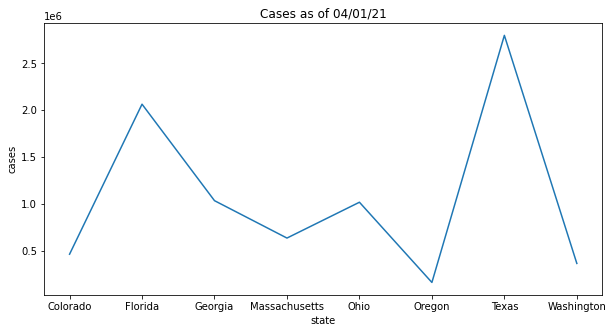

In [54]:
#GRAPH showing the number of covid cases per day
#READ in file
Rates_tot = pd.read_csv('us-states.csv')
#FILTER by dates & states avalible in other file
Rates_april= Rates_tot[Rates_tot['date'] == '2021-04-01']
#Rates_graph = Rates_april[Rates_april['state'] == "Colorado","Florida","Georgia","Maryland","Oregon","Ohio","Texas","Washington"]
Rates_graph = Rates_april[Rates_april.state.isin(["Colorado","Oregon","Florida","Georgia","Ohio",'Massachusetts',"Texas","Washington"])]
Rates_graph
#RESIZE plot
plt.figure(figsize = (10,5))
#PLOT
sns.lineplot(x="state",y = 'cases',data=Rates_graph)
sns.lineplot()
plt.title('Cases as of 04/01/21')